### Vilken linje klassificerar datan bäst?

Här nedan plottas alla 600 punkter, tillsammans med de fyra linjerna
> $p(x)=-1.5x+0.2$<br>
> $f(x)=-0.489x$<br>
> $g(x)=-2x+0.16$<br>
> $h(x)=800x-120$<br>

där $p(x)$ är min egen linje från första uppgiften. Eftersom punkterna (med några enstaka undantag) är tydligt uppdelade i två kluster, är det troligt att alla fyra linjerna kommer att ha hög träffsäkerhet när det gäller att klassificera punkterna.

Vi kan se att de tre linjerna med negativt _k_-värde åstadkommer nästan identisk klassificering av punkterna, medan linjen $h(x)$ har en delvis annan klassifcering av punkterna närmast _y_-axeln. Vi ska strax gå in på vilka ytterligare skillnader som kan finnas mellan de olika modellerna.

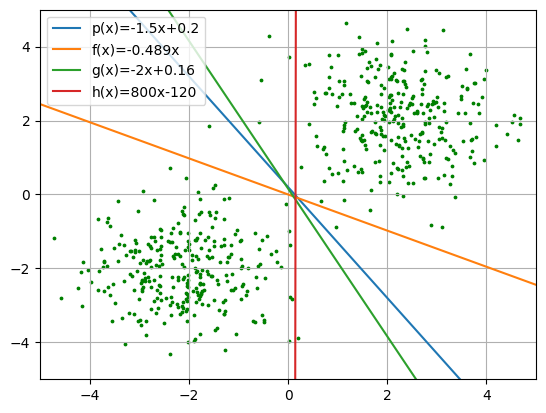

In [4]:
import numpy as np
import matplotlib.pyplot as plt

path1 = "unlabelled_data.csv"

k_values = [-1.5, -.489, -2, 800]
m_values = [.2, 0, .16, -120]

data_list=[]            # all points will be stored here

def read_unlabelled_data():     # all points are read and stored in the nested list data_list
    with open(path1, "r") as data:
        for row in data:
            row_list=row.strip().split(",")
            data_list.append(row_list)

def plot_lines():               # all four lines are plotted in the same chart
    x_values=np.linspace(-5,5,11)
    for j in range(4):
        k = k_values[j]
        m = m_values[j]
        y_values=[k * x + m for x in x_values]
        plt.plot(x_values, y_values)
    
def plot_points():              # make separate lists of x- and y-coordinates respectively, then scatter them together with the lines
    x, y = [], []
    for j in data_list:
        x.append(float(j[0]))
        y.append(float(j[1]))
    plt.scatter(x, y, c="g", s=3)
    plt.grid()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.legend(["p(x)=-1.5x+0.2", "f(x)=-0.489x", "g(x)=-2x+0.16", "h(x)=800x-120"])
    plt.show()

read_unlabelled_data()
plot_lines()
plot_points()


Då vi räknar antalet punkter i respektive klass, utifrån de fyra olika modellerna, ser vi här nedan att alla linjer utom $h(x)$ (den enda med positivt _k_-värde), sorterar punkterna med 299 st i __klass 0__ (vänster om linjen), och 301 st i __klass 1__ (höger om linjen). $p(x)$ och $g(x)$ gör exakt samma uppdelning, medan $f(x)$ har två punkter som "bytt klass" med varandra, jämfört med $p(x)$ och $g(x)$.

Vi har inte kännedom om varje punkts korrekta klass, så vi kan inte avgöra hur träffsäker klassificeringen är, men med tanke på de tydliga klustren så är det rimligt att anta att alla modellerna har hög träffsäkerhet. Det är dock farligt att dra slutsatsen att "troligen har bara en enda punkt hamnat fel"; det kan lika gärna vara exempelvis sex 0:or som blivit felklassificerade som 1:or, och fem 1:or som blivit felklassificerade som 0:or, vilket i så fall skulle innebära att klustren delvis överlappar varandra.

In [5]:
import copy         

point_counter=[[0,0], [0,0], [0,0], [0,0]]     # this will hold the number of points in each class, for each of the four lines

p_list=copy.deepcopy(data_list)         # make four copies of the original data_list (list of points), but without references
f_list=copy.deepcopy(data_list)         # these lists will hold all classification
g_list=copy.deepcopy(data_list)
h_list=copy.deepcopy(data_list)

lists=[p_list, f_list, g_list, h_list] 

n=0                 # counter from 0 to 3, while going through the four lists
for i in lists:     # we go through all four lists (lines), and examine all 600 points
    for j in i:     # each datapoint is appended with 0 (left of line) or 1 (right of line), for future reference
        x=float(j[0])
        y=float(j[1])
        k = k_values[n]
        m = m_values[n]
        if (y > k * x + m and k < 0) or (y < k * x + m and k > 0):    # if line has positive slope, class "0" and class "1" are reversed
            j.append(1)
            point_counter[n][1] += 1        # number of points in class 1, for line number n
        else:
            j.append(0)
            point_counter[n][0] += 1        # number of points in class 0, for line number n
    n+=1

line_names=["p(x)", "f(x)", "g(x)", "h(x)"]

for j in range(4):
    print(f"If we use line {line_names[j]}, {point_counter[j][0]} points are classified as '0' and {point_counter[j][1]} points are classified as '1'.")
print("\nThe complete classification lists are named p_list, f_list, g_list and h_list.")    

If we use line p(x), 299 points are classified as '0' and 301 points are classified as '1'.
If we use line f(x), 299 points are classified as '0' and 301 points are classified as '1'.
If we use line g(x), 299 points are classified as '0' and 301 points are classified as '1'.
If we use line h(x), 302 points are classified as '0' and 298 points are classified as '1'.

The complete classification lists are named p_list, f_list, g_list and h_list.


Vi ska nu plotta alla fyra linjerna, med punkterna uppdelade i klasser utifrån respektive linje, för att därefter kunna diskutera skillnader samt eventuella för- och nackdelar.

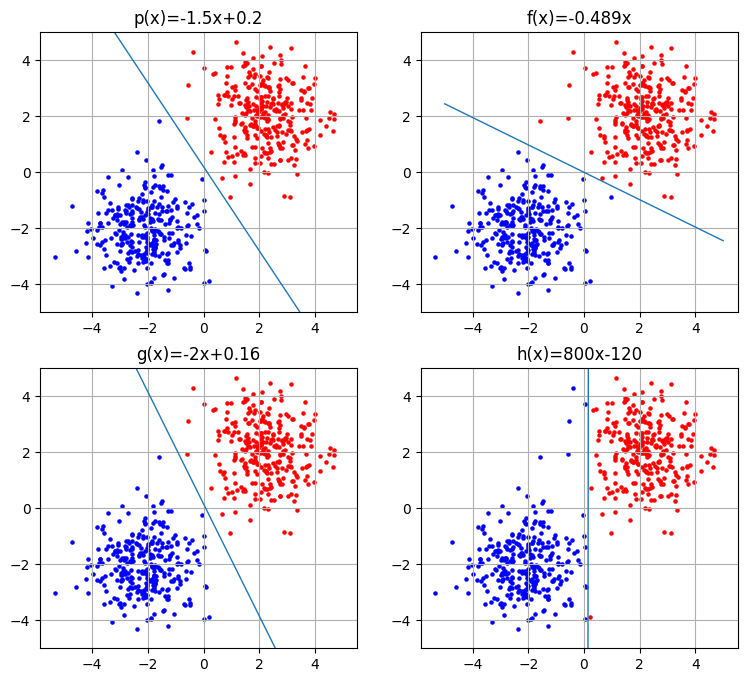

In [6]:

def make_lists_by_classes(list):        # make separate lists for easier plotting. This will be done for each of the four lines.
    class_0 = [row for row in list if row[2]==0]
    class_1 = [row for row in list if row[2]==1]    
    x0, y0, x1, y1 = [], [], [], []
    for j in class_0:
        x0.append(float(j[0]))
        y0.append(float(j[1]))
    for j in class_1:
        x1.append(float(j[0]))
        y1.append(float(j[1]))   
    return x0, y0, x1, y1               # lists x0 and y0 hold coordinates for points in class 0. Lists x1 and y1 hold coordinates for points in class 1.


x_values=np.linspace(-5,5,11)           # x values for plotting lines
p_values, f_values, g_values, h_values = [], [], [], []     # these lists will hold the y-values, which are different for each line
value_lists=[p_values, f_values, g_values, h_values]        

for j in range(4):
    value_lists[j]=[k_values[j] * x + m_values[j] for x in x_values]    # y-values are set according to k- and m-values from first python section

title_list=["p(x)=-1.5x+0.2", "f(x)=-0.489x", "g(x)=-2x+0.16", "h(x)=800x-120"]     # plot titles

plt.figure(figsize=(9,8))                               # four separate plots, each with one line and the points classified accordingly
for j in range(4):
    list=lists[j]
    x0, y0, x1, y1 = make_lists_by_classes(list)
    plt.subplot(2, 2, j+1)
    plt.scatter(x0, y0, color="b", s=5)
    plt.scatter(x1, y1, color="r", s=5)
    plt.plot(x_values, value_lists[j], linewidth=1)
    plt.title(title_list[j])
    plt.ylim(-5,5)
    plt.grid()


Vi kan börja med att konstatera att de två klustren verkar vara koncentrerade kring punkterna (-2, -2) respektive (2, 2). Detta skulle antyda att linjen $y=-x$ vore den bästa linjen för att klassificera punkterna (den utgör mittpunktsnormalen mellan de två klustrens centra.)

Det som talar mot $y=-x$-modellen är att klustren är något mer utbredda i y-led än i x-led, vilket bland annat innebär att vi har fler punkter som till synes befinner sig på "fel" sida x-axeln än på "fel" sida y-axeln. För att inte felklassificera för många av dessa, bör vi välja en linje med lite kraftigare lutning, låt säga $k=-1.5$ eller $k=-2$.

Man kan därefter justera _m_-värdet något. Med tanke på klustrens centra, som tidigare nämnts, är det rimligt att vi har ett _m_-värde nära 0. Om man vill ta mest hänsyn till de punkter som ligger nära linjen, så skulle man kunna välja ett svagt positivt _m_-värde, t.ex. 0.2, men samtidigt bör man inte låta några enstaka punkter påverka sitt val för mycket. Man ska komma ihåg att ju närmare linjen punkterna ligger, desto större är chansen/risken att de i själva verket hör till den andra klassen.

Sammantaget kan man säga att de tre linjerna $f(x)$, $g(x)$ och $p(x)$ (där den sistnämnda är min egen) gör i princip samma jobb, dock har linjen $f(x)$ troligen lite för flack lutning med hänsyn till klustrens utbredning. Vi kan också konstatera att vilken linje som helst med _k_-värde mellan ca -0.5 och -5 (och _m_-värde nära 0) resulterar i nästan identisk klassificering.

Linjen $h(x)=800x-120$ skiljer sig en del från de övriga, framför allt genom det kraftigt positiva _k_-värdet. Detta motsvarar i praktiken en helt vertikal uppdelning av punkterna, men vi har dessvärre inte möjlighet att skriva vertikala linjer på $y=kx+m$-form. Man kan konstatera att exempelvis linjen $h(x)=-800x+120$ (alltså med omvänt tecken på _k_- och _m_-värdena) skulle få nästan exakt samma vertikala utseende, och klassificera punkterna likadant.

Med tanke på att linjen $h(x)$ också är lätt förskjuten till höger om origo (tack vare _m_-värdet på 120), så klassificerar den punkterna som ligger omedelbart till höger om y-axeln i fjärde kvadranten, till klass 0. Viktigaste skillnaden gentemot de övriga tre linjerna är dock att den även sorterar alla punkter i andra kvadranten till klass 0, medan övriga linjer sorterar flera av dessa punkter till klass 1.

Vad ska man då säga om linjen $h(x)$? Enligt min mening är det det sämsta modellen, då den inte tar någon som helst hänsyn till att det ena klustret har sin tyngdpunkt en bra bit ovanför det andra (_y_-koordinaterna är alltså större). Uppdelningen görs alltså i princip enbart med avseende på punkternas _x_-koordinater, vilket är en rejäl svaghet hos modellen.